### Import numpy, matplotlib.pyplot

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Read RegData csv file into numpy array 

In [2]:
data = np.genfromtxt('RegData.csv',delimiter=',')

In [3]:
data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

### Define variables X and y. 
### Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [5]:
X = data[:,0]
Y = data[:,1]

In [6]:
print(f'X = {X}')

X = [2.9000001  6.69999981 4.9000001  7.9000001  9.80000019 6.9000001
 6.0999999  6.19999981 6.         5.0999999  4.69999981 4.4000001
 5.80000019]


In [7]:
print(f'Y = {Y}')

Y = [4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


### Plot the data (scatter plot of X,y)

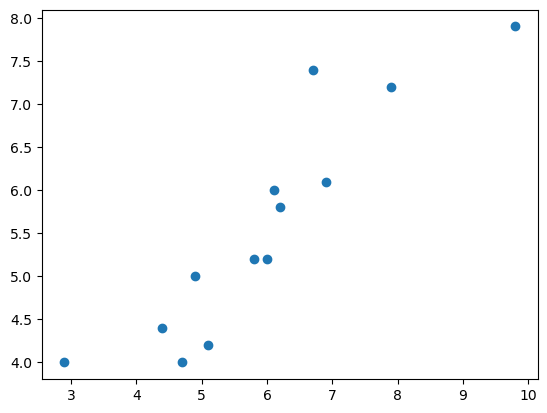

In [10]:
plt.scatter(X,Y)

## Single Variable LR Implementation
### Follow the following steps:

### Step1: Initialize model parameters (theta_0 & theta_1):
- It is recommended to intitialize theta_0 = 0 and theta_1 = 0.
- Define the Learning rate value e.g. 0.01.
- Get the number of data points (m).

In [35]:
theta_0 = 0
theta_1 = 0
lr = 0.01
m = X.shape[0]
m

13

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
- Do not loop through data points. Simply multiply X by theta_1 then add to theta_0.

In [18]:
h = theta_0 + X * theta_1
print(f'h(x):{h}')

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Step3: Calculate the MSE Cost function 𝑱(theta_0,theta_1 ).
<b>Note:</b> You better use either dot product or norm square of the error vector.

In [26]:
e = h - Y
#j = (e@e) / (2*m)
j = np.linalg.norm(e)**2 / (2*m)
print(f'Error Vector:\n{e}\n')
print(f'j = {j}')

Error Vector:
[-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j = 16.305384479692314


### Step4: Calculate the gradient components for theta_0 and theta_1.
<b>Note:</b> You can use the error vector calculated in the previous step.

In [32]:
d_theta_0 = sum(e) / m
d_theta_1 =e@X / m
print(f'd_theta_0 : {d_theta_0}')
print(f'd_theta_1 : {d_theta_1}')

d_theta_0 : -5.569230739769231
d_theta_1 : -35.04384604321538


### Step5: Update the parameters (simultaneously).

In [34]:
theta_0 = theta_0 - lr * d_theta_0
theta_1 = theta_1 - lr * d_theta_1
print(f'theta_0_new : {theta_0}')
print(f'theta_1_new : {theta_1}')

theta_0_new : 0.05569230739769231
theta_1_new : 0.3504384604321538


##### You made only one iteration. You need to iterate till to converge to the optimum solution (acheive the minimum of the cost function) or reach to the maximum number of iterations.

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations (e.g. 1000):
##### The objective from this step is to combine all the previous steps and iterate untill you either achieve the maximum number of iterations (1000 iterations) or reach the minimum.
##### Do not forget to put the initialization of theta_0, theta_1, and learnig rate in the same cell (use learning rate = 0.001). 
##### For this step, do not apply any stop conditions. Let the optimizer reaches the maximum number of iterations.

In [36]:
#1
theta_0 = 0
theta_1 = 0
lr = 0.01
m = X.shape[0]

for i in range(1000):
    print(f'****************** Iteration {i} ********************')
    #2
    h = theta_0 + X * theta_1
    print(f'h(x):{h}')
    #3
    e = h - Y
    #j = (e@e) / (2*m)
    j = np.linalg.norm(e)**2 / (2*m)
    print(f'Error Vector:\n{e}\n')
    print(f'j = {j}')
    
    #4
    d_theta_0 = sum(e) / m
    d_theta_1 =e@X / m
    
    Gradient_Vector = np.array([[d_theta_0],
                     [d_theta_1]])
    print(f'Gradient Vector: {Gradient_Vector}')
    Gradient_Vector_norm = np.linalg.norm(Gradient_Vector)
    print(f'Gradient Vector Norm: {Gradient_Vector_norm}')
    
    #5
    theta_0 = theta_0 - lr * d_theta_0
    theta_1 = theta_1 - lr * d_theta_1
    print(f'theta_0_new : {theta_0}')
    print(f'theta_1_new : {theta_1}')
    

****************** Iteration 0 ********************
h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Error Vector:
[-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j = 16.305384479692314
Gradient Vector: [[ -5.56923074]
 [-35.04384604]]
Gradient Vector Norm: 35.483622652336
theta_0_new : 0.05569230739769231
theta_1_new : 0.3504384604321538
****************** Iteration 1 ********************
h(x):[1.07196388 2.40362993 1.7728408  2.82415618 3.48998929 2.47371772
 2.19336688 2.2284107  2.15832307 1.84292842 1.702753   1.59762157
 2.08823544]
Error Vector:
[-2.92803612 -4.99637017 -3.2271592  -4.37584363 -4.41001081 -3.62628219
 -3.80663312 -3.5715895  -3.04167674 -2.35707139 -2.297247   -2.80237853
 -3.11176436]

j = 6.175608808043302
Gradient Vector: [[ -3.42708175]
 [-21.33845263]]
Gradient Vector Norm: 21.611905283072655
theta_0_new : 0.08996312489803084
theta_1_new : 0.563822986

### Implement the stop condition:
#### The optimizer reaches the optimium solution:
- This can be known if the norm of the gradient vector approximately equals to zero (practically we compare the gradient norm to a small value e.g <b>grad_norm < 0.1</b>).
- The check should be done before parameters update.

In [54]:
#1
theta_0 = 0
theta_1 = 0
lr = 0.01
m = X.shape[0]

for i in range(1000):
    print(f'****************** Iteration {i} ********************')
    #2
    h = theta_0 + X * theta_1
    print(f'h(x):{h}')
    #3
    e = h - Y
    #j = (e@e) / (2*m)
    j = np.linalg.norm(e)**2 / (2*m)
    print(f'Error Vector:\n{e}\n')
    print(f'j = {j}')
    
    #4
    d_theta_0 = sum(e) / m
    d_theta_1 =e@X / m
    
    Gradient_Vector = np.array([[d_theta_0],
                     [d_theta_1]])
    print(f'Gradient Vector: {Gradient_Vector}')
    Gradient_Vector_norm = np.linalg.norm(Gradient_Vector)
    print(f'Gradient Vector Norm: {Gradient_Vector_norm}')
    
    if Gradient_Vector_norm < 0.1:
        print(f'****************** Training Report ********************\n')
        print(f'Gradient Descent converged after {i+1} iterations\n')
        print(f'theta_0_Opt : {theta_0}')
        print(f'theta_1_Opt : {theta_1}\n')
        print(f'Error Vector:\n{e}\n')
        print(f'Cost = {j}\n')
        print(f'h(x) = y_predict:\n{h}\n')
        print(f'y_actual:\n{Y}\n')
        break
    
    
    #5
    theta_0 = theta_0 - lr * d_theta_0
    theta_1 = theta_1 - lr * d_theta_1
    print(f'theta_0_new : {theta_0}')
    print(f'theta_1_new : {theta_1}')
    

****************** Iteration 0 ********************
h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Error Vector:
[-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j = 16.305384479692314
Gradient Vector: [[ -5.56923074]
 [-35.04384604]]
Gradient Vector Norm: 35.483622652336
theta_0_new : 0.05569230739769231
theta_1_new : 0.3504384604321538
****************** Iteration 1 ********************
h(x):[1.07196388 2.40362993 1.7728408  2.82415618 3.48998929 2.47371772
 2.19336688 2.2284107  2.15832307 1.84292842 1.702753   1.59762157
 2.08823544]
Error Vector:
[-2.92803612 -4.99637017 -3.2271592  -4.37584363 -4.41001081 -3.62628219
 -3.80663312 -3.5715895  -3.04167674 -2.35707139 -2.297247   -2.80237853
 -3.11176436]

j = 6.175608808043302
Gradient Vector: [[ -3.42708175]
 [-21.33845263]]
Gradient Vector Norm: 21.611905283072655
theta_0_new : 0.08996312489803084
theta_1_new : 0.563822986

### Predict y values using the LR equation 
- Now we will use the obtained optimum parameters <b>theta_0 and theta_1</b> to make predition using the equation: 
<div style='text-align: center;'>
    <b>h(x)= theta_0 + theta_1 * x</b>
</div>


In [55]:
y_pred = theta_0 + theta_1 * X
y_pred

array([2.74498295, 6.14196626, 4.53286904, 7.21469817, 8.91319004,
       6.32075512, 5.60560052, 5.69499474, 5.5162063 , 4.71165748,
       4.35408017, 4.08589751, 5.33741786])

### Plot the LR equation predicted output (fitted line) and the original data (scatter plot of X,y)

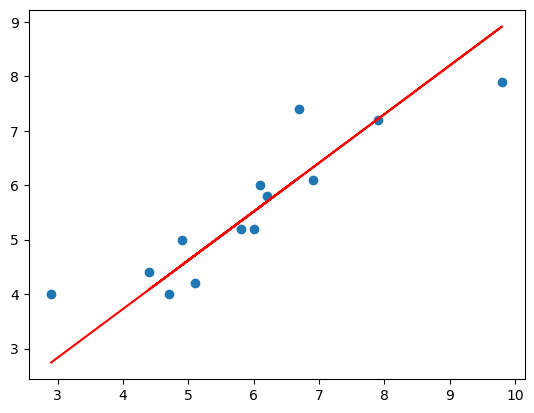

In [56]:
plt.scatter(X,Y)
plt.plot(X,y_pred,'r')

### Use R Squared metrics to evaluate LR equation output
- Can be found in <b>sklearn.metrics</b>

https://www.youtube.com/watch?v=KccCy0hu-dM

In [57]:
from sklearn.metrics import r2_score
r2_score(Y,y_pred)

0.7480324921408193

### In order to obtain better score you can try to keep iterating to be closer to minimum:
- Update the stop condition <b>grad_norm<0.001</b>.
- Increase the learning rate <b>(0.01)</b> to perform larger update step.
- Increase number of maximum iterations <b>(e.g. 10000)</b>.

In [58]:
#1
theta_0 = 0
theta_1 = 0
lr = 0.01
m = X.shape[0]

for i in range(10000):
    print(f'****************** Iteration {i} ********************')
    #2
    h = theta_0 + X * theta_1
    print(f'h(x):{h}')
    #3
    e = h - Y
    #j = (e@e) / (2*m)
    j = np.linalg.norm(e)**2 / (2*m)
    print(f'Error Vector:\n{e}\n')
    print(f'j = {j}')
    
    #4
    d_theta_0 = sum(e) / m
    d_theta_1 =e@X / m
    
    Gradient_Vector = np.array([[d_theta_0],
                     [d_theta_1]])
    print(f'Gradient Vector: {Gradient_Vector}')
    Gradient_Vector_norm = np.linalg.norm(Gradient_Vector)
    print(f'Gradient Vector Norm: {Gradient_Vector_norm}')
    
    if Gradient_Vector_norm < 0.001:
        print(f'****************** Training Report ********************\n')
        print(f'Gradient Descent converged after {i+1} iterations\n')
        print(f'theta_0_Opt : {theta_0}')
        print(f'theta_1_Opt : {theta_1}\n')
        print(f'Error Vector:\n{e}\n')
        print(f'Cost = {j}\n')
        print(f'h(x) = y_predict:\n{h}\n')
        print(f'y_actual:\n{Y}\n')
        break
    
    #5
    theta_0 = theta_0 - lr * d_theta_0
    theta_1 = theta_1 - lr * d_theta_1
    print(f'theta_0_new : {theta_0}')
    print(f'theta_1_new : {theta_1}')
    

****************** Iteration 0 ********************
h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Error Vector:
[-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j = 16.305384479692314
Gradient Vector: [[ -5.56923074]
 [-35.04384604]]
Gradient Vector Norm: 35.483622652336
theta_0_new : 0.05569230739769231
theta_1_new : 0.3504384604321538
****************** Iteration 1 ********************
h(x):[1.07196388 2.40362993 1.7728408  2.82415618 3.48998929 2.47371772
 2.19336688 2.2284107  2.15832307 1.84292842 1.702753   1.59762157
 2.08823544]
Error Vector:
[-2.92803612 -4.99637017 -3.2271592  -4.37584363 -4.41001081 -3.62628219
 -3.80663312 -3.5715895  -3.04167674 -2.35707139 -2.297247   -2.80237853
 -3.11176436]

j = 6.175608808043302
Gradient Vector: [[ -3.42708175]
 [-21.33845263]]
Gradient Vector Norm: 21.611905283072655
theta_0_new : 0.08996312489803084
theta_1_new : 0.563822986

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Error Vector:
[-0.56554893 -1.31135359 -0.16860386 -0.27318606  0.35391154  0.12834131
 -0.33043695 -0.06058995  0.39971606  0.77109071  0.69170143  0.08215978
  0.26002168]

j = 0.14247317239538854
Gradient Vector: [[-0.00175206]
 [ 0.00027384]]
Gradient Vector Norm: 0.0017733351588456786
theta_0_new : 1.408898162459357
theta_1_new : 0.698469798690969
****************** Iteration 5669 ********************
h(x):[3.43446065 6.08864568 4.83140024 6.92680964 8.25390232 6.22833984
 5.66956387 5.73941078 5.59971695 4.97109407 4.69170608 4.48216534
 5.46002313]
Error Vector:
[-0.56553935 -1.31135441 -0.16859976 -0.27319017  0.35390223  0.12833993
 -0.33043613 -0.06058941  0.39971715  0.77109426  0.69170608  0.08216525
  0.26002332]

j = 0.14247314095913174
Gradient Vector: [[-0.00175085]
 [ 0.00027365]]
Gradient Vector Norm: 0.0017721036954617708
theta_0_new : 1.4089156709368118
theta_1_new : 0.6984670622027153
****************** Iteration 5670 ********************
h(x):[3.43447022 6.0886448

### Use R Squared metrics to evaluate the new prediction.

In [59]:
y_pred2 = theta_0 + theta_1 * X
r2_score(Y,y_pred)

0.7480324921408193

### You can try different values of max. iterations, learning rate, and grad_norm to achieve the best r2_score value in minimum number of iterations (try at home).

### Plot the new prediction and the original data

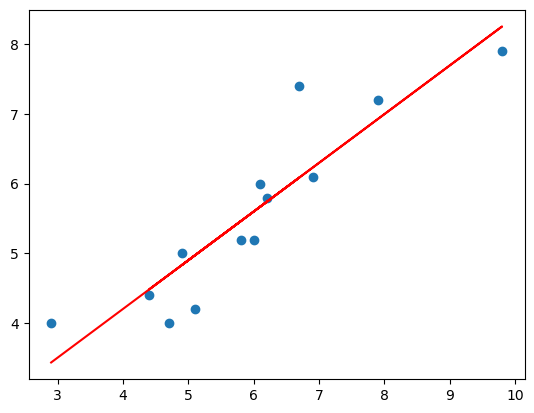

In [61]:
plt.scatter(X,Y)
plt.plot(X,y_pred2,'r')

### Plot both predictions and the original data to see the difference in prediction.

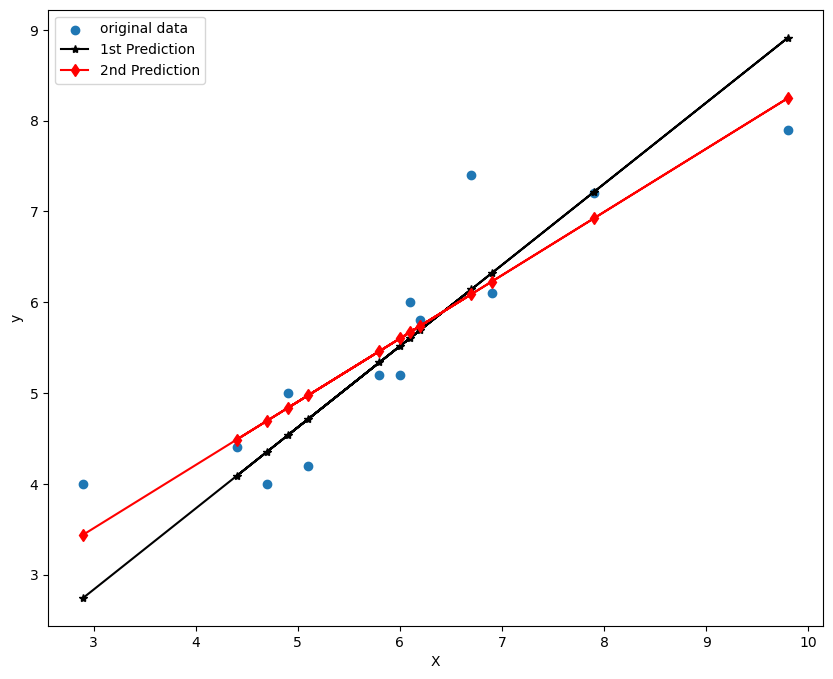

In [63]:
plt.figure(figsize =(10,8))
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X,y_pred,'k*-')
plt.plot(X,y_pred2,'rd-')
plt.legend(['original data','1st Prediction','2nd Prediction'])
plt.show()

## Plot loss function
### Repeat your implementaion version and save loss for each iteration (epoch)
### Use the following parameters:
- learning rate = 0.001.
- Maximum number of iterations = 1000.
- Stop condition grad_norm < 0.1.

In [64]:
#1
theta_0 = 0
theta_1 = 0
lr = 0.001
m = X.shape[0]
loss = []
for i in range(1000):
    print(f'****************** Iteration {i} ********************')
    #2
    h = theta_0 + X * theta_1
    print(f'h(x):{h}')
    #3
    e = h - Y
    #j = (e@e) / (2*m)
    j = np.linalg.norm(e)**2 / (2*m)
    loss.append(j)
    print(f'Error Vector:\n{e}\n')
    print(f'j = {j}')
    
    #4
    d_theta_0 = sum(e) / m
    d_theta_1 =e@X / m
    
    Gradient_Vector = np.array([[d_theta_0],
                     [d_theta_1]])
    print(f'Gradient Vector: {Gradient_Vector}')
    Gradient_Vector_norm = np.linalg.norm(Gradient_Vector)
    print(f'Gradient Vector Norm: {Gradient_Vector_norm}')
    
    if Gradient_Vector_norm < 0.1:
        print(f'****************** Training Report ********************\n')
        print(f'Gradient Descent converged after {i+1} iterations\n')
        print(f'theta_0_Opt : {theta_0}')
        print(f'theta_1_Opt : {theta_1}\n')
        print(f'Error Vector:\n{e}\n')
        print(f'Cost = {j}\n')
        print(f'h(x) = y_predict:\n{h}\n')
        print(f'y_actual:\n{Y}\n')
        break
    
    #5
    theta_0 = theta_0 - lr * d_theta_0
    theta_1 = theta_1 - lr * d_theta_1
    print(f'theta_0_new : {theta_0}')
    print(f'theta_1_new : {theta_1}')

****************** Iteration 0 ********************
h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Error Vector:
[-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j = 16.305384479692314
Gradient Vector: [[ -5.56923074]
 [-35.04384604]]
Gradient Vector Norm: 35.483622652336
theta_0_new : 0.005569230739769231
theta_1_new : 0.03504384604321538
****************** Iteration 1 ********************
h(x):[0.10719639 0.24036299 0.17728408 0.28241562 0.34899893 0.24737177
 0.21933669 0.22284107 0.21583231 0.18429284 0.1702753  0.15976216
 0.20882354]
Error Vector:
[-3.89280361 -7.1596371  -4.82271592 -6.91758419 -7.55100117 -5.85262813
 -5.78066331 -5.57715912 -4.9841675  -4.01570697 -3.8297247  -4.24023794
 -4.99117626]

j = 15.07090799409579
Gradient Vector: [[ -5.35501584]
 [-33.6733067 ]]
Gradient Vector Norm: 34.09644818591864
theta_0_new : 0.010924246580564925
theta_1_new : 0.0687171

r squared: 0.7483046604086072


### Plot loss vs. iterations

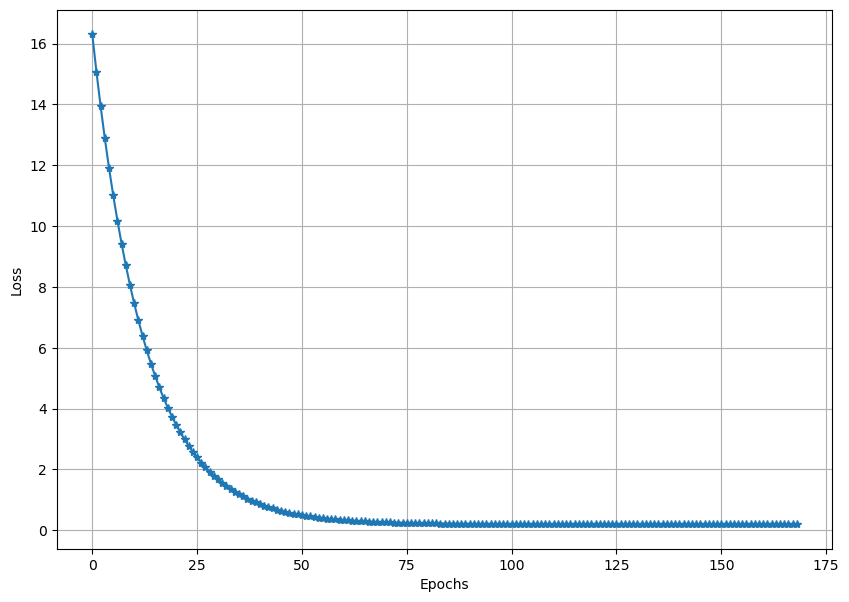

In [65]:
plt.figure(figsize=(10,7))
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss,'-*')
plt.show()